In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

In [31]:
from torchvision import datasets, transforms
mnist_train = datasets.MNIST(root="./datasets", train = True, transform = transforms.ToTensor(), download = True)
mnist_test = datasets.MNIST(root="./datasets", train = False, transform = transforms.ToTensor(), download = True)

In [32]:
print("Number of mnist training examples: {}".format(len(mnist_train)))
print("Number of mnist test examples: {}".format(len(mnist_test)))

Number of mnist training examples: 60000
Number of mnist test examples: 10000


In [33]:
print(mnist_train[3])

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

default image shape : torch.Size([1, 28, 28])
reshaped image shape : torch.Size([28, 28])
label of the train data : 1


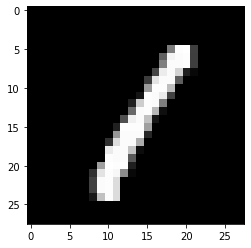

In [34]:
image, label = mnist_train[3]
print("default image shape : {}".format(image.shape))
image = image.reshape([28,28])
print("reshaped image shape : {}".format(image.shape))
plt.imshow(image,cmap="gray")

print("label of the train data : {}".format(label))

In [35]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size = 100, shuffle = True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size = 100, shuffle = False)

In [36]:
data_train_iter = iter(train_loader)
images, labels = data_train_iter.next()
print("image shape : {}".format(images.shape))
print("label shape : {}".format(labels.shape))
print(labels)
# print(images)

image shape : torch.Size([100, 1, 28, 28])
label shape : torch.Size([100])
tensor([7, 5, 9, 4, 9, 1, 9, 9, 4, 8, 4, 0, 8, 8, 8, 1, 8, 9, 3, 5, 3, 9, 6, 7,
        4, 1, 7, 4, 1, 7, 5, 5, 9, 5, 0, 3, 5, 8, 2, 4, 6, 4, 2, 4, 5, 8, 7, 8,
        9, 7, 7, 7, 9, 7, 0, 5, 6, 9, 7, 4, 3, 2, 1, 6, 2, 7, 0, 0, 6, 1, 5, 4,
        1, 8, 7, 9, 1, 3, 4, 9, 3, 3, 5, 1, 0, 4, 4, 0, 5, 7, 9, 9, 0, 5, 2, 0,
        4, 6, 6, 4])


In [37]:
x = images.view(-1,28*28)
print("The shape of input x is: {}".format(x.shape))

The shape of input x is: torch.Size([100, 784])


In [38]:
W = torch.randn(784,10)/np.sqrt(784)
W.requires_grad_()

b=torch.zeros(10,requires_grad = True)

In [39]:
print(W)

tensor([[ 0.0360,  0.0603,  0.0024,  ..., -0.0474, -0.0170,  0.0256],
        [ 0.0107, -0.0205,  0.0719,  ..., -0.0340, -0.0309,  0.0803],
        [ 0.0059, -0.0113, -0.0356,  ...,  0.0299, -0.0163,  0.0091],
        ...,
        [-0.0510, -0.0382, -0.0344,  ..., -0.0344,  0.0842,  0.0424],
        [-0.0341,  0.0293, -0.0012,  ..., -0.0002,  0.1016, -0.0701],
        [ 0.0095, -0.0170,  0.0147,  ..., -0.0680, -0.0100,  0.0164]],
       requires_grad=True)


In [40]:
y = torch.matmul(x,W)+b

In [41]:
print(y[0,:])

tensor([-0.8907,  0.6329,  0.5252, -0.2621,  0.1483,  0.0024, -0.2084, -0.0299,
        -0.3401, -0.2425], grad_fn=<SliceBackward>)


In [42]:
py_eq = torch.exp(y)/torch.sum(torch.exp(y),dim=1,keepdim=True)
print("py_eq[0] from the equation: {}".format(py_eq[0]))

py_eq[0] from the equation: tensor([0.0403, 0.1847, 0.1658, 0.0755, 0.1138, 0.0983, 0.0796, 0.0952, 0.0698,
        0.0770], grad_fn=<SelectBackward>)


In [43]:
import torch.nn.functional as F
py = F.softmax(y,dim=1)
print("py[0] with torch.nn.functional.softmax : {}".format(py[0]))

py[0] with torch.nn.functional.softmax : tensor([0.0403, 0.1847, 0.1658, 0.0755, 0.1138, 0.0983, 0.0796, 0.0952, 0.0698,
        0.0770], grad_fn=<SelectBackward>)


In [44]:
print(labels.shape)

torch.Size([100])


In [45]:
print(labels)

tensor([7, 5, 9, 4, 9, 1, 9, 9, 4, 8, 4, 0, 8, 8, 8, 1, 8, 9, 3, 5, 3, 9, 6, 7,
        4, 1, 7, 4, 1, 7, 5, 5, 9, 5, 0, 3, 5, 8, 2, 4, 6, 4, 2, 4, 5, 8, 7, 8,
        9, 7, 7, 7, 9, 7, 0, 5, 6, 9, 7, 4, 3, 2, 1, 6, 2, 7, 0, 0, 6, 1, 5, 4,
        1, 8, 7, 9, 1, 3, 4, 9, 3, 3, 5, 1, 0, 4, 4, 0, 5, 7, 9, 9, 0, 5, 2, 0,
        4, 6, 6, 4])


In [46]:
cross_entropy_eq = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print("cross_entropy_eq from equation: {}".format(cross_entropy_eq))

cross_entropy_eq from equation: 2.4264659881591797


In [47]:
cross_entropy = F.cross_entropy(y,labels)
print("cross entropy from torch.nn.functional.cross_entropy: {}".format(cross_entropy))

cross entropy from torch.nn.functional.cross_entropy: 2.4264657497406006


In [48]:
print(y.shape)

torch.Size([100, 10])


In [49]:
optimizer = torch.optim.SGD([W,b],lr=0.1)

In [50]:
cross_entropy.backward()

In [51]:
b.grad

tensor([-0.0077,  0.0232,  0.0859,  0.0213, -0.0557, -0.0038,  0.0186, -0.0095,
        -0.0021, -0.0702])

In [52]:
optimizer.step()

In [53]:
b


tensor([ 0.0008, -0.0023, -0.0086, -0.0021,  0.0056,  0.0004, -0.0019,  0.0010,
         0.0002,  0.0070], requires_grad=True)

In [54]:
print("befor : {}".format(b.grad))
optimizer.zero_grad()
print("after : {}".format(b.grad))

befor : tensor([-0.0077,  0.0232,  0.0859,  0.0213, -0.0557, -0.0038,  0.0186, -0.0095,
        -0.0021, -0.0702])
after : tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [55]:
for images,labels in tqdm(train_loader):
    optimizer.zero_grad()
    x=images.view(-1,28*28)
    y=torch.matmul(x,W)+b
    cross_entropy = F.cross_entropy(y,labels)
    cross_entropy.backward()
    optimizer.step()

  0%|          | 0/600 [00:00<?, ?it/s]

In [56]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
    for images, labels in tqdm(test_loader):
        x = images.view(-1,28*28)
        y= torch.matmul(x,W)+b
        predictions = torch.argmax(y,dim=1)
        correct += torch.sum((predictions==labels).float())
print("test accuracy : {}%".format(correct/total*100))

  0%|          | 0/100 [00:00<?, ?it/s]

test accuracy : 90.27000427246094%


In [57]:
Wmax = 0
Bmax = 0
MaxAc = 0
for i in range(1):
    for images,labels in tqdm(train_loader):
        optimizer.zero_grad()
        x=images.view(-1,28*28)
        y=torch.matmul(x,W)+b
        cross_entropy = F.cross_entropy(y,labels)
        cross_entropy.backward()
        optimizer.step()
    correct = 0
    total = len(mnist_test)

    with torch.no_grad():
        for images, labels in tqdm(test_loader):
            x = images.view(-1,28*28)
            y= torch.matmul(x,W)+b
            predictions = torch.argmax(y,dim=1)
            correct += torch.sum((predictions==labels).float())
    print("test accuracy : {}%".format(correct/total*100))
    if MaxAc<=(correct/total):
        MaxAc = correct/total
        Wmax = W
        Bmax = b
        print("Max accuracy  : {}%".format(MaxAc*100))


  0%|          | 0/600 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

test accuracy : 91.14999389648438%
Max accuracy  : 91.14999389648438%


In [71]:
correct = 0
total = len(mnist_test)

with torch.no_grad():
        for images, labels in tqdm(test_loader):
            x = images.view(-1,28*28)
            y= torch.matmul(x,W)+b
            predictions = torch.argmax(y,dim=1)
            correct += torch.sum((predictions==labels).float())
print("test accuracy  : {}%".format(correct/total*100))
print(W.shape)
print(Wmax.shape)

  0%|          | 0/100 [00:00<?, ?it/s]

test accuracy  : 91.14999389648438%
torch.Size([784, 10])
torch.Size([784, 10])


In [76]:
predictions = torch.argmax(y,dim=1)
print(predictions)

tensor([8, 9, 0, 1, 2, 9, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1,
        9, 2, 8, 4, 4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 0, 6, 3, 5, 8, 9, 1, 4,
        0, 6, 1, 0, 0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 3, 2,
        4, 9, 4, 2, 6, 4, 1, 7, 3, 6, 2, 0, 1, 2, 8, 4, 5, 6, 7, 8, 9, 0, 1, 2,
        3, 4, 5, 6])


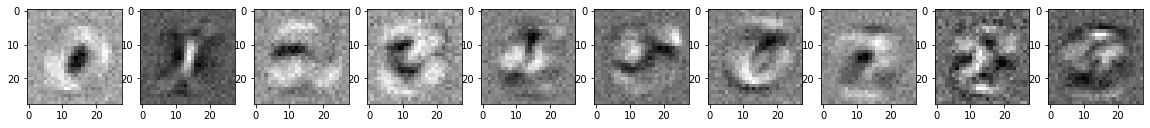

In [59]:
fig,ax = plt.subplots(1,10,figsize=(20,2))

for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28,28),cmap="gray")

In [60]:
print(W.shape)

torch.Size([784, 10])


In [61]:
print(y.shape)

torch.Size([100, 10])


In [62]:
print(x.shape)

torch.Size([100, 784])


In [63]:
print(y[0])


tensor([-1.9814,  0.8872,  0.9610,  0.6360, -1.3311,  2.1168, -1.0281, -3.5937,
         4.7348, -1.6015])


In [67]:
import torch.nn.functional as F

x_relu_F = F.relu(y)

print("x after ReLU with nn.functional: {}".format(x_relu_F))

x after ReLU with nn.functional: tensor([[ 0.0000,  0.8872,  0.9610,  0.6360,  0.0000,  2.1168,  0.0000,  0.0000,
          4.7348,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  4.6315,  1.7901,  0.0000,  0.1127,
          2.8745,  4.7279],
        [ 6.2346,  0.0000,  0.0000,  0.0000,  0.0000,  4.3915,  0.0000,  0.2680,
          0.0000,  0.0000],
        [ 0.0000,  5.2492,  1.5972,  0.5892,  0.4821,  0.0000,  0.0000,  0.0000,
          2.6734,  0.0000],
        [ 0.9838,  0.0000,  2.1972,  0.5393,  0.7889,  0.5518,  0.0000,  0.0000,
          0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.6034,  0.0000,  0.0000,  0.0000,  0.0000,  4.1153,
          2.5929,  4.9794],
        [ 0.0000,  0.0000,  1.1252,  0.0000,  4.7742,  0.0000,  2.4852,  0.0000,
          1.6386,  0.0000],
        [ 1.2070,  0.0000,  0.7705,  0.0000,  0.0000,  4.5155,  0.1446,  0.0000,
          2.0439,  0.0000],
        [ 1.8812,  0.0000,  1.3748,  0.0000,  0.8547,  1.7431,  8.2780,  0.0000,
          0.00